In [57]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

In [58]:
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

ADANIPOWER = yf.download('ADANIPOWER.NS', start=start, end=end)
IREDA = yf.download('IREDA.NS', start=start, end=end)
SBIN = yf.download('SBIN.NS', start=start, end=end)
ADANIGREEN = yf.download('ADANIGREEN.NS', start=start, end=end)

ADANIPOWER['Stock'] = 'ADANIPOWER'
IREDA['Stock'] = 'IREDA'
SBIN['Stock'] = 'SBIN'
ADANIGREEN['Stock'] = 'ADANIGREEN'

tech_list = ['ADANIPOWER.NS', 'IREDA.NS', 'SBIN.NS', 'ADANIGREEN.NS']

company_list = [ADANIPOWER, IREDA, SBIN, ADANIGREEN]
company_name = ['ADANIPOWER.NS', 'IREDA.NS', 'SBIN.NS', 'ADANIGREEN.NS']

df = pd.concat([ADANIPOWER, IREDA, SBIN, ADANIGREEN])

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Stock
Date,,,,,,,
2022-09-08,413.00,413.500000,399.000000,401.899994,401.899994,2271073,ADANIPOWER
2022-09-09,405.75,406.850006,395.000000,397.000000,397.000000,2420630,ADANIPOWER
2022-09-12,402.00,402.899994,395.500000,397.600006,397.600006,2022749,ADANIPOWER
2022-09-13,400.50,400.500000,392.500000,393.600006,393.600006,2257842,ADANIPOWER
2022-09-14,385.75,397.000000,383.299988,384.549988,384.549988,3469526,ADANIPOWER


In [59]:
df.loc['2024-08-30']

,Open,High,Low,Close,Adj Close,Volume,Stock
Date,,,,,,,
2024-08-30,648.500000,649.700012,629.400024,632.049988,632.049988,4777522,ADANIPOWER
2024-08-30,258.000000,259.500000,238.050003,241.500000,241.500000,45308414,IREDA
2024-08-30,817.150024,820.700012,814.349976,815.599976,815.599976,8911426,SBIN
2024-08-30,1833.750000,1861.800049,1824.000000,1838.150024,1838.150024,1052305,ADANIGREEN


In [60]:
ADANIPOWER.describe()

,Open,High,Low,Close,Adj Close,Volume
count,492.000000,492.000000,492.000000,492.000000,492.000000,4.920000e+02
mean,417.200611,424.870936,408.310670,416.092175,416.092175,7.930372e+06
std,177.733992,180.651021,173.510035,176.607162,176.607162,1.113513e+07
min,135.100006,140.800003,132.399994,139.350006,139.350006,4.024140e+05
25%,270.387497,275.449997,264.587502,270.974991,270.974991,1.989648e+06
50%,365.899994,372.550003,357.800003,365.574997,365.574997,3.487514e+06
75%,565.250000,570.337494,553.250000,562.287506,562.287506,1.006453e+07
max,873.000000,895.849976,826.650024,874.500000,874.500000,1.223087e+08


Closing Price

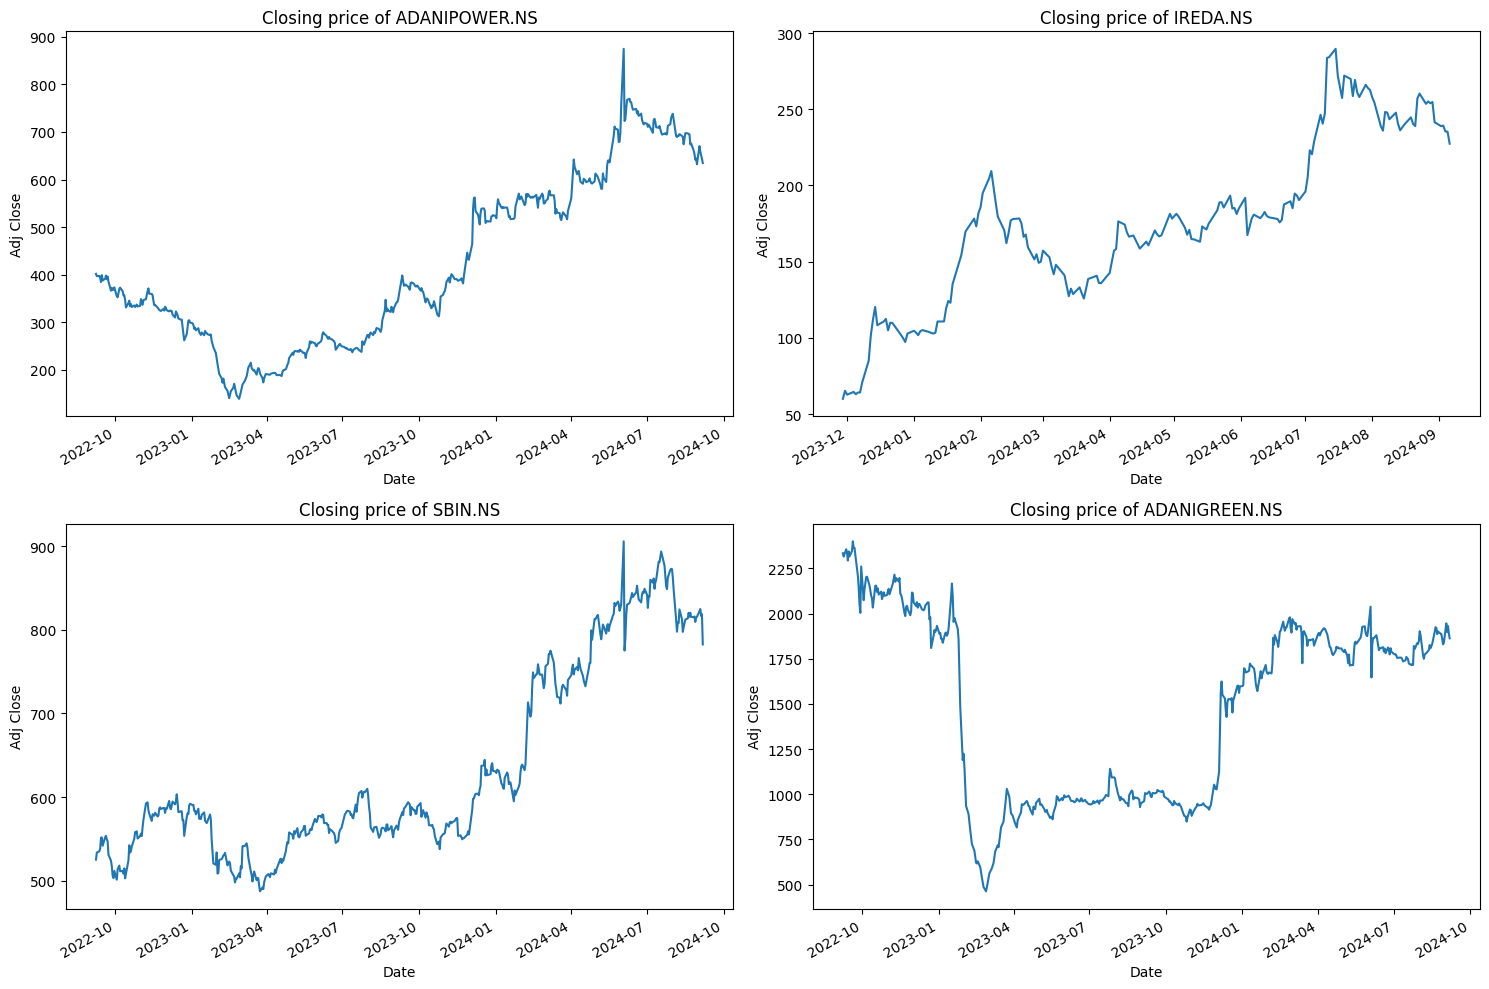

In [61]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing price of {tech_list[i-1]}")

plt.tight_layout()

Volume of Sales

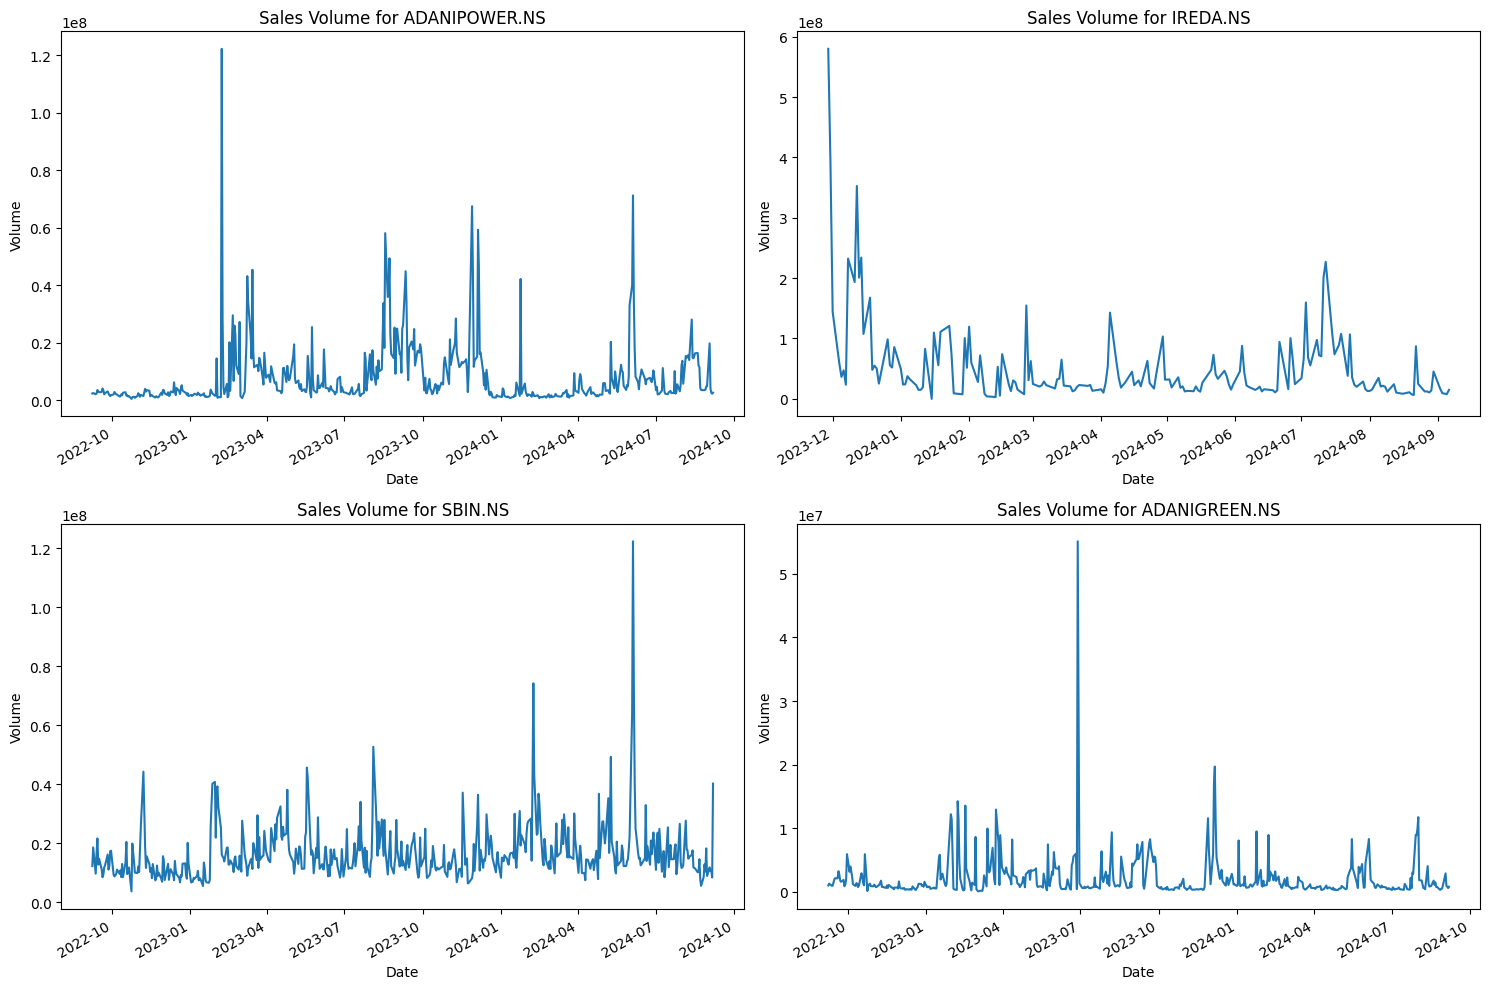

In [62]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {tech_list[i-1]}")

plt.tight_layout()

In [63]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


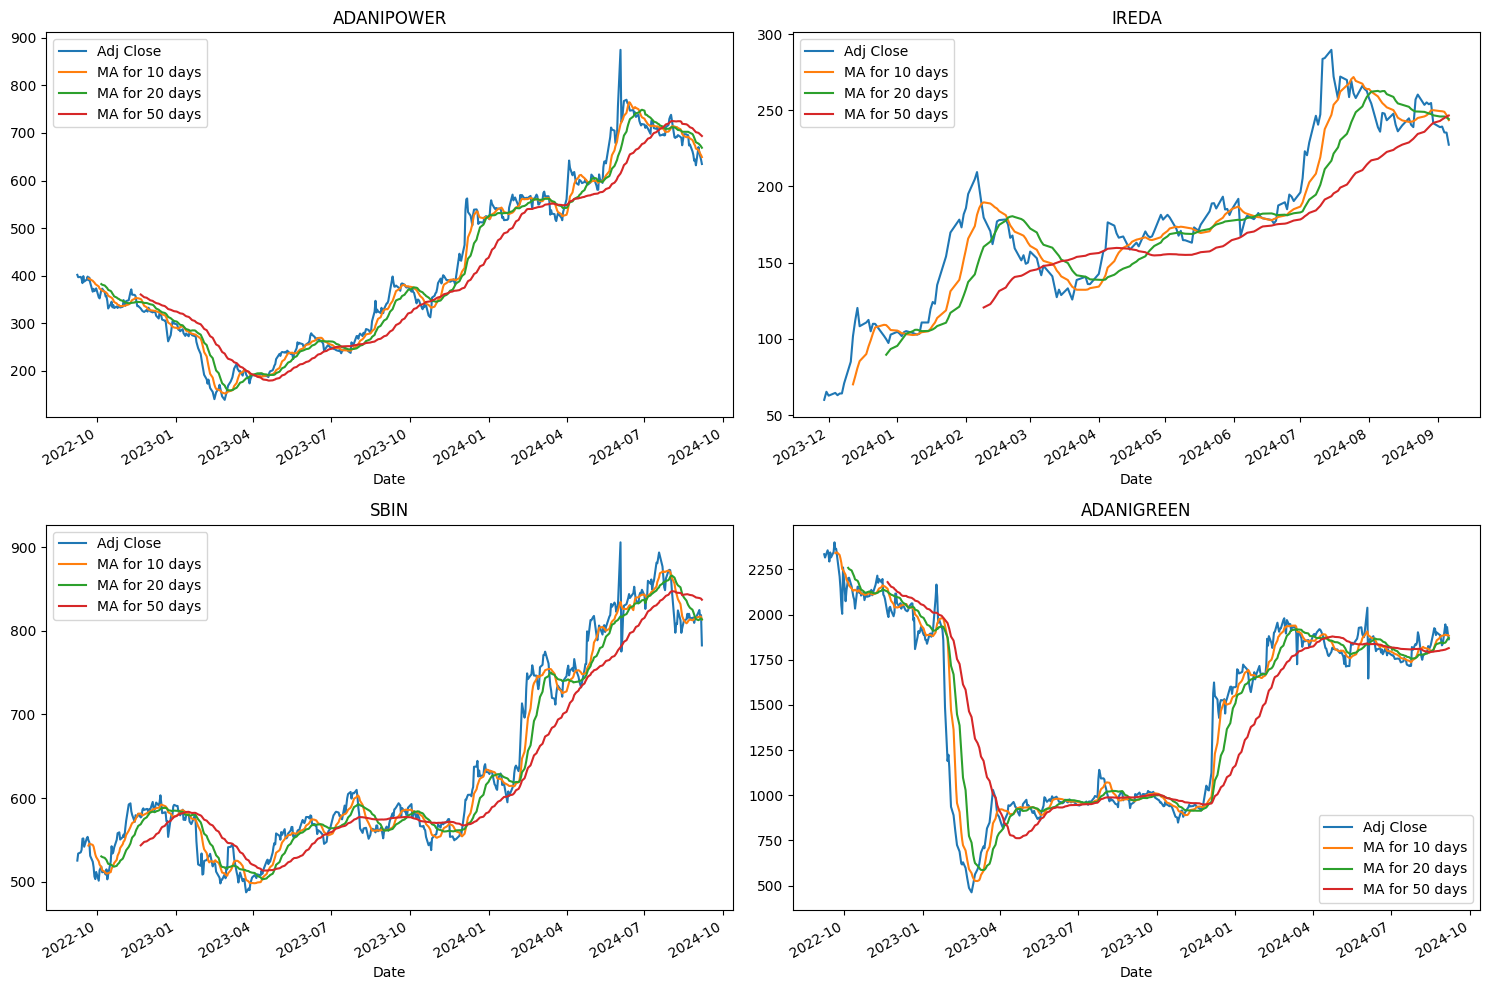

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 10))

ADANIPOWER[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[0,0])
axes[0,0].set_title('ADANIPOWER')
fig.tight_layout()

IREDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[0,1])
axes[0,1].set_title('IREDA')
fig.tight_layout()

SBIN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[1,0])
axes[1,0].set_title('SBIN')
fig.tight_layout()

ADANIGREEN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[1,1])
axes[1,1].set_title('ADANIGREEN')
fig.tight_layout()

** What was the daily return of the stock on average?**

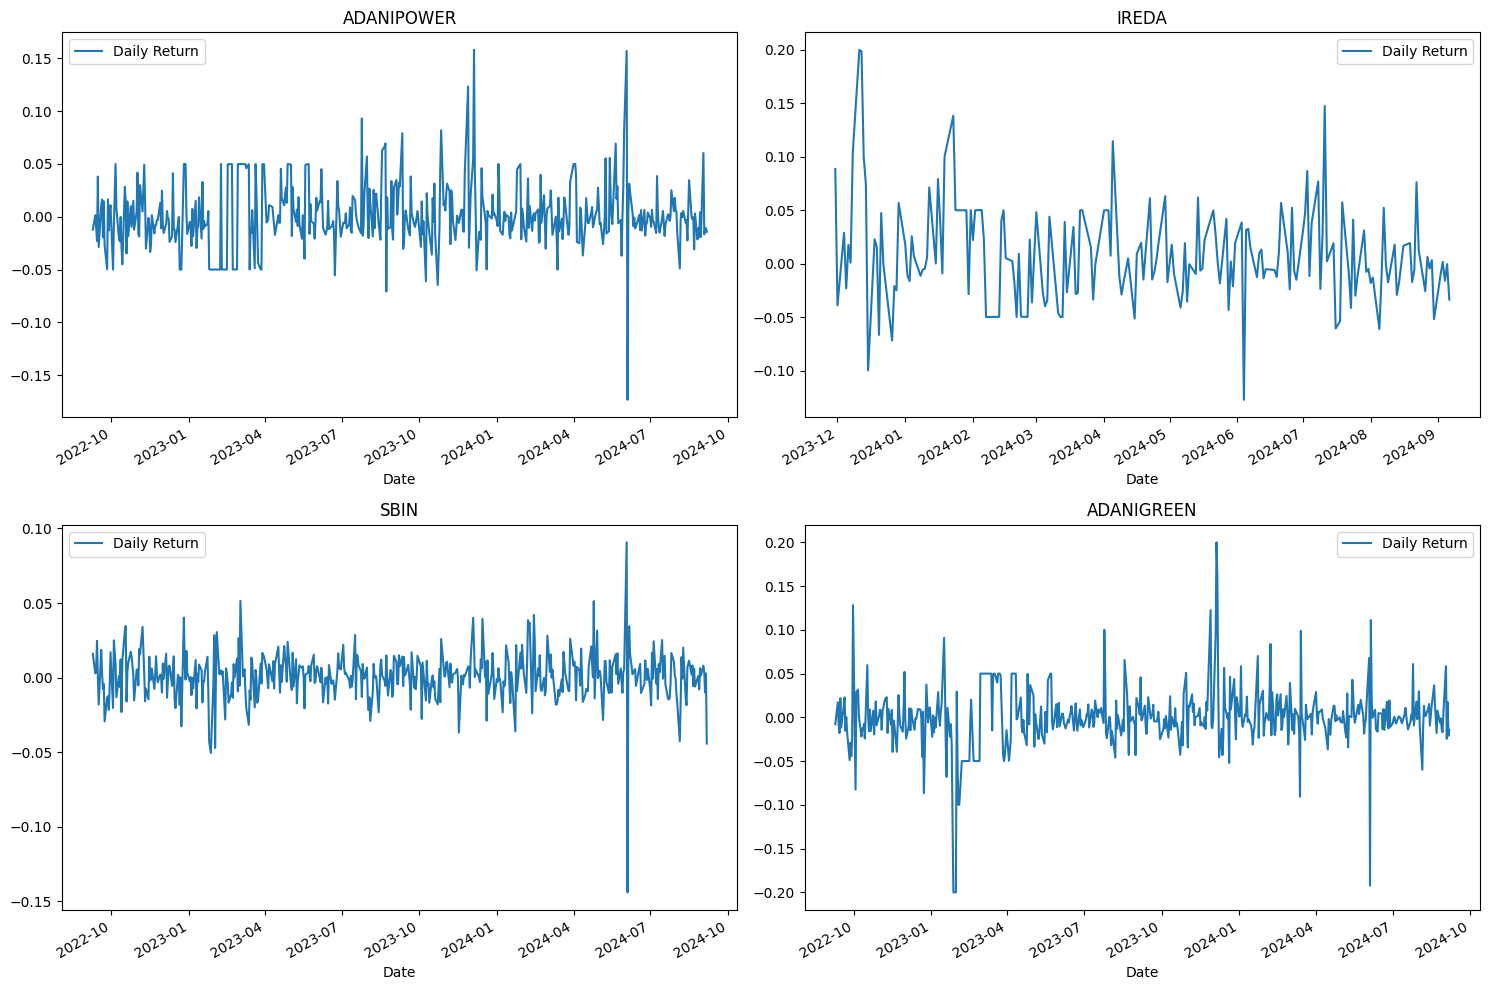

In [65]:
for company in company_list:
    company['Daily Return'] = company['Adj Close']. pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 10))

ADANIPOWER[['Daily Return']].plot(ax = axes[0, 0])
axes[0, 0].set_title('ADANIPOWER')

IREDA[['Daily Return']].plot(ax = axes[0, 1])
axes[0, 1].set_title('IREDA')

SBIN[['Daily Return']].plot(ax = axes[1, 0])
axes[1, 0].set_title('SBIN')

ADANIGREEN[['Daily Return']].plot(ax = axes[1, 1])
axes[1, 1].set_title('ADANIGREEN')


plt.tight_layout()
fig.tight_layout()

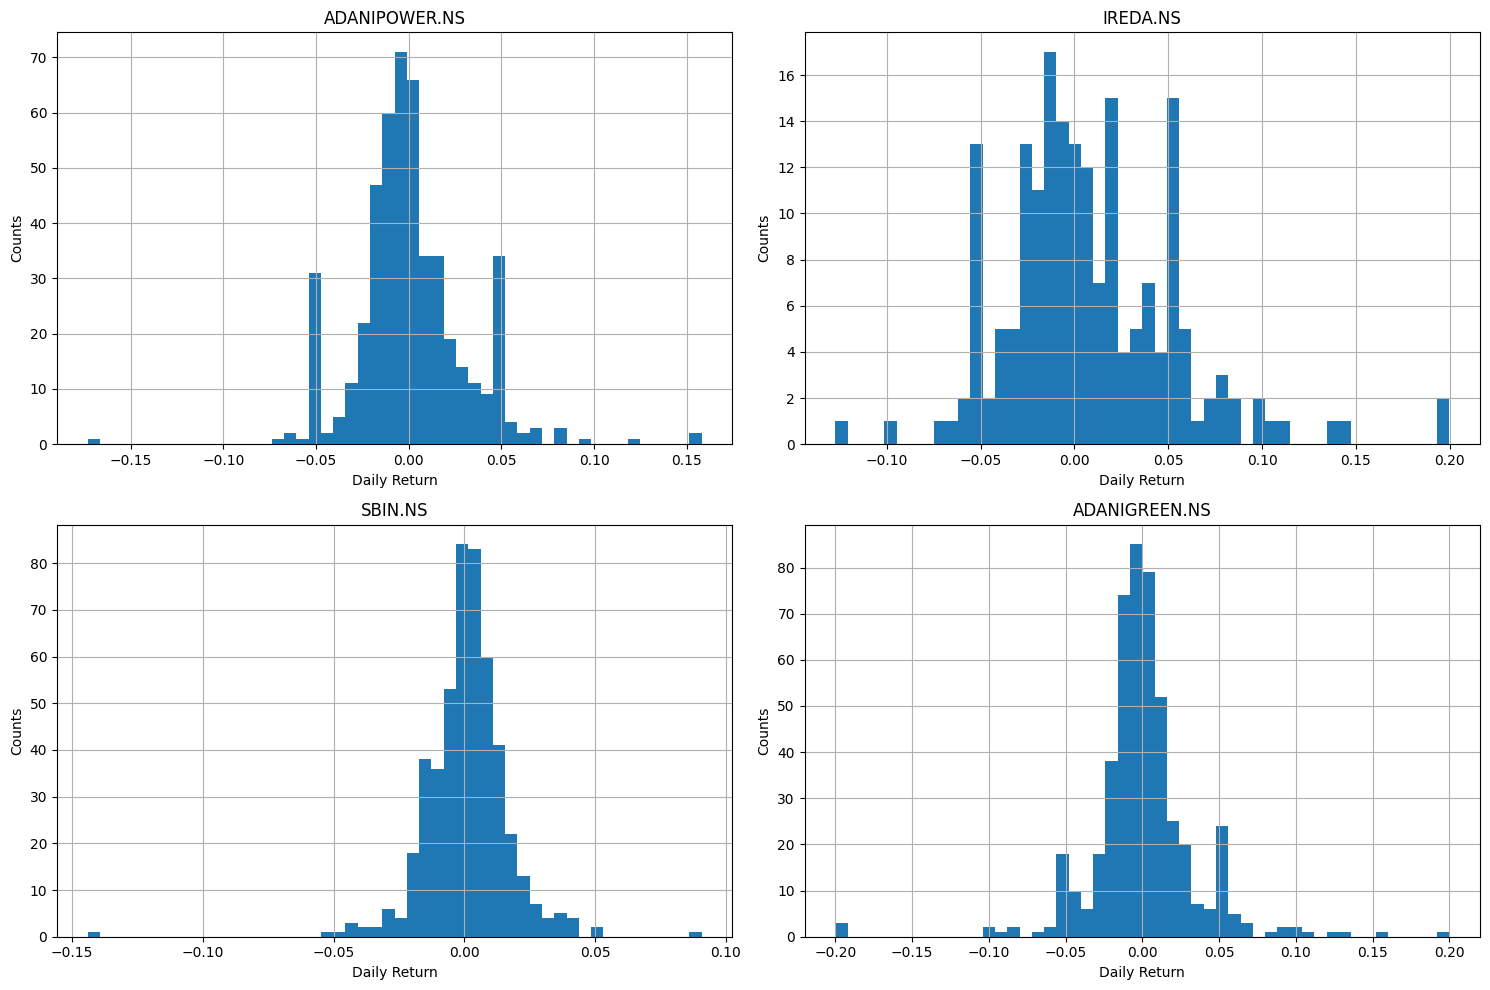

In [66]:
plt.figure(figsize = (15, 10))

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Daily Return'].hist(bins = 50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f"{company_name[i-1]}")

plt.tight_layout()

In [67]:
closing_df = pd.concat([ADANIPOWER['Adj Close'], IREDA['Adj Close'], SBIN['Adj Close'], ADANIGREEN['Adj Close']], axis=1)
closing_df.columns = ['ADANIPOWER', 'IREDA', 'SBIN', 'ADANIGREEN']
tech_rets = closing_df.pct_change()
tech_rets.head()

,ADANIPOWER,IREDA,SBIN,ADANIGREEN
Date,,,,
2022-09-08,NaN,NaN,NaN,NaN
2022-09-09,-0.012192,NaN,0.015973,-0.007776
2022-09-12,0.001511,NaN,0.002801,0.017294
2022-09-13,-0.010060,NaN,0.005587,-0.008617
2022-09-14,-0.022993,NaN,0.024642,-0.018003


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

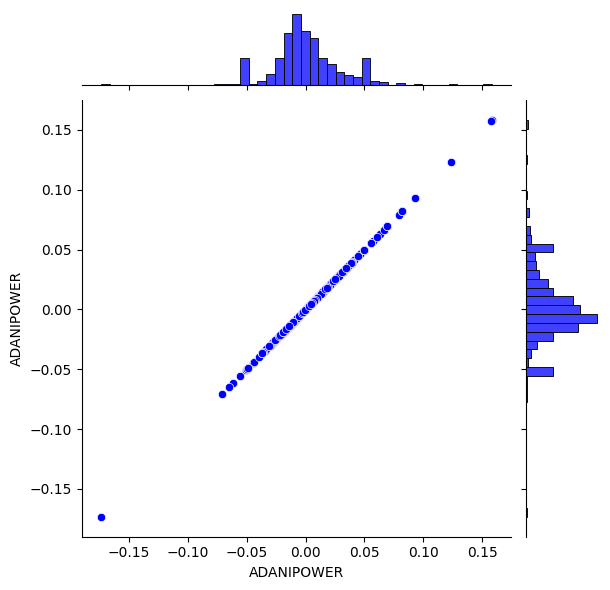

In [68]:
sns.jointplot(x = 'ADANIPOWER', y = 'ADANIPOWER', data = tech_rets, kind = 'scatter', color = 'blue')

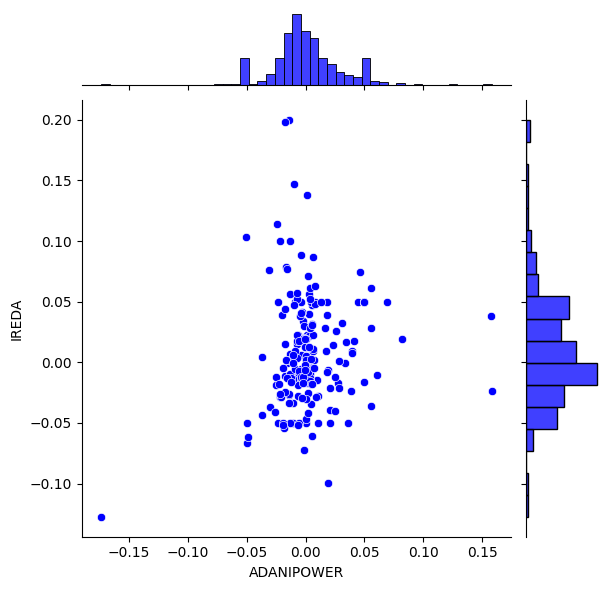

In [69]:
sns.jointplot(x = 'ADANIPOWER', y = 'IREDA', data = tech_rets, kind = 'scatter', color = 'blue')

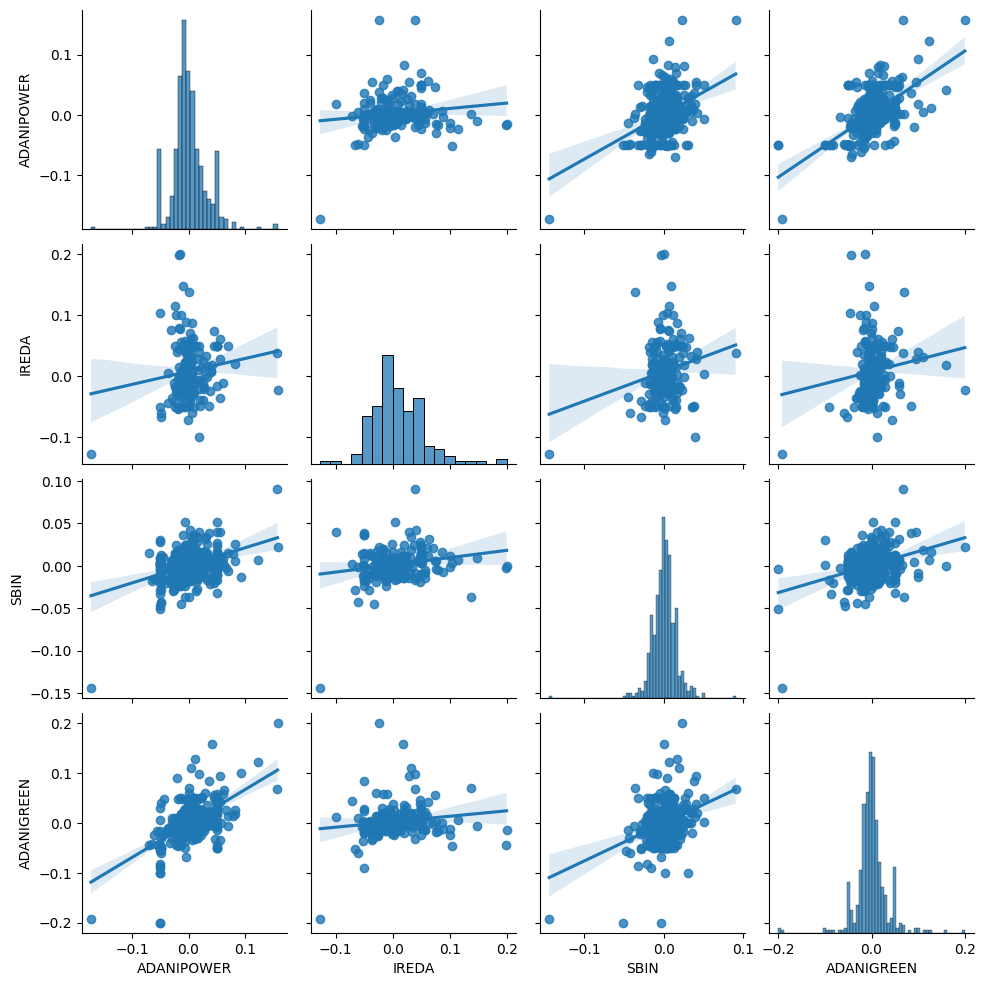

In [70]:
sns.pairplot(tech_rets, kind = 'reg')

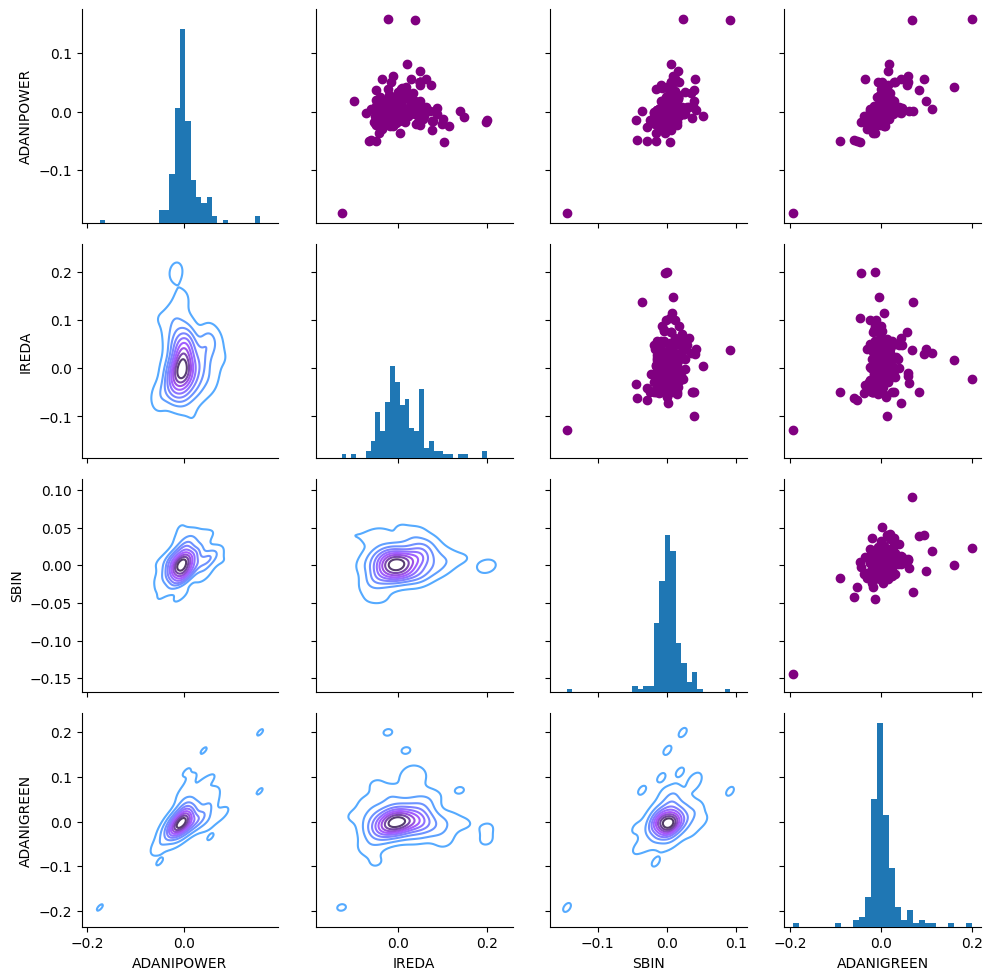

In [71]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

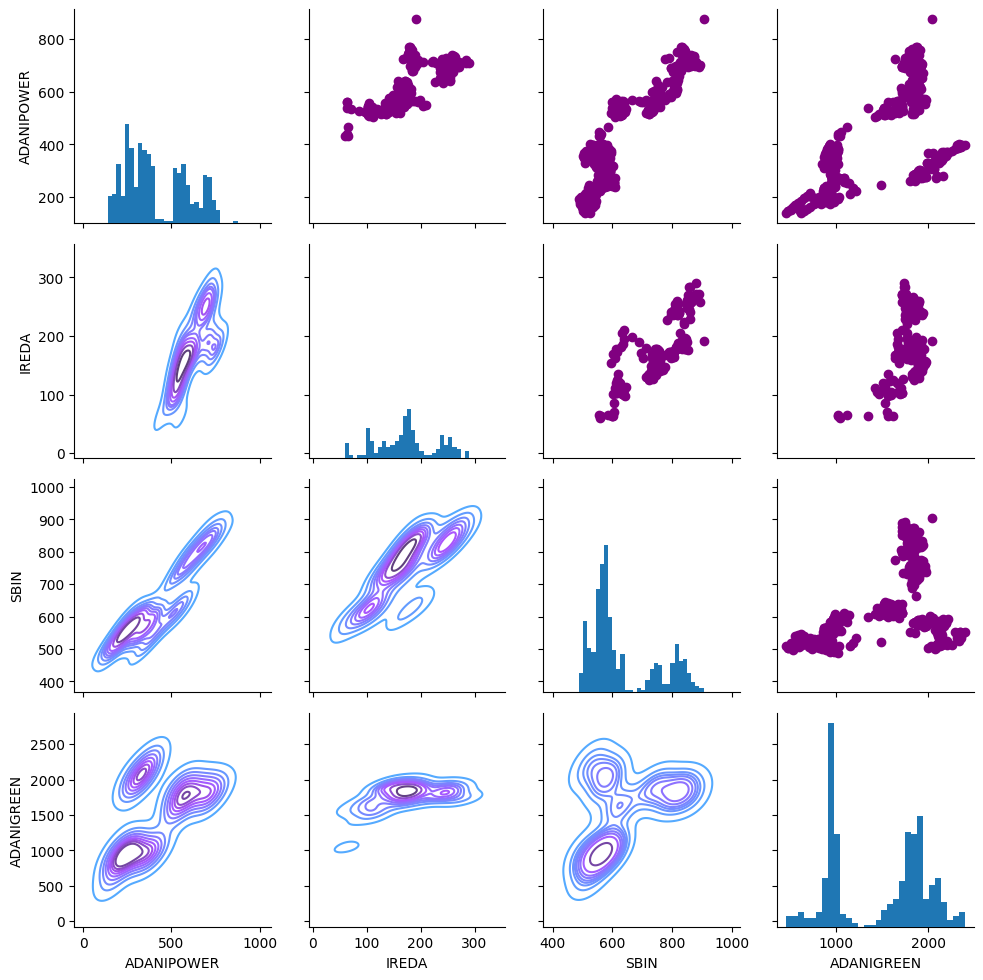

In [72]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

Text(0.5, 1.0, 'Correlation of stocks closing price')

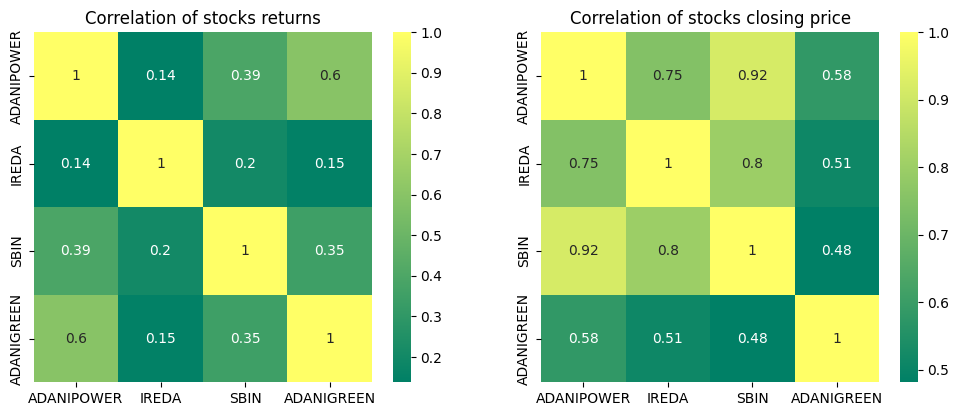

In [73]:
plt.figure( figsize = (12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of stocks returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of stocks closing price')

 How much value do we put at risk by investing in a particular stock?

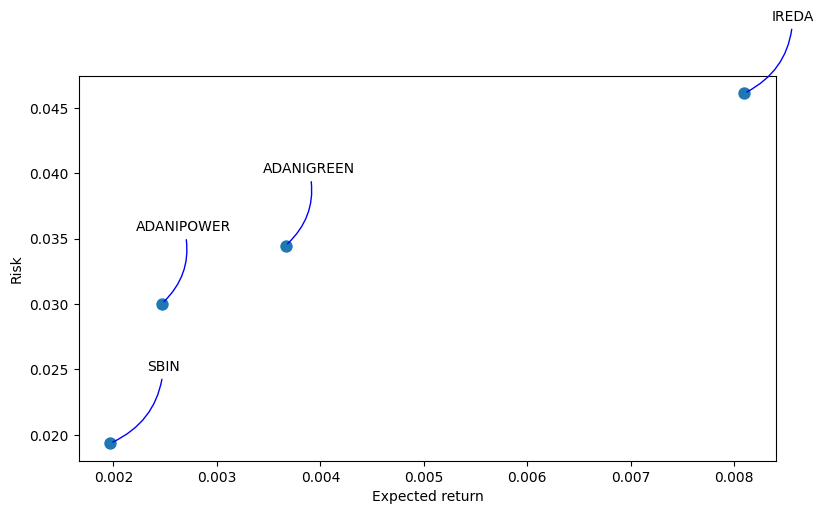

In [74]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(9, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

 Predicting the closing price of SBIN

In [75]:
df_SBIN = yf.download('SBIN.NS', '2010-01-01', end)
df_SBIN.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,192.488800,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,192.560242,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,193.715393,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,192.631638,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,192.056137,10453820


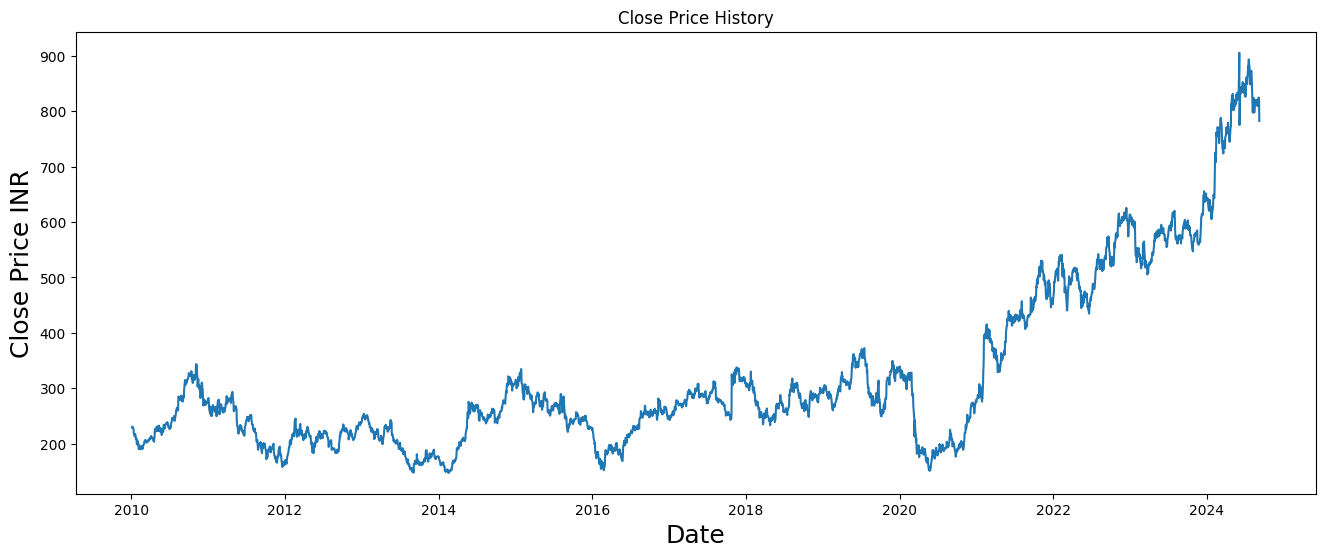

In [76]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_SBIN['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [77]:
data = df_SBIN.filter([ 'Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

2898

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.10782154],
       [0.10793364],
       [0.10974693],
       ...,
       [0.88243281],
       [0.88540002],
       [0.83759509]])

In [79]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.10782154, 0.10793364, 0.10974693, 0.10804572, 0.10714238,
       0.10465653, 0.09621649, 0.09261627, 0.09016998, 0.08832373,
       0.0900447 , 0.09224702, 0.09049967, 0.08578512, 0.08093869,
       0.08149916, 0.06779068, 0.06984794, 0.07688352, 0.07222171,
       0.06656425, 0.0692611 , 0.06254862, 0.05594165, 0.06105184,
       0.06286513, 0.05779451, 0.05855939, 0.0555724 , 0.05894842,
       0.06372891, 0.06182332, 0.05693072, 0.05838794, 0.05780111,
       0.05903414, 0.05803189, 0.06603013, 0.0676588 , 0.07237337,
       0.07373169, 0.07564388, 0.07811655, 0.07530101, 0.07433172,
       0.07545266, 0.07573618, 0.07141066, 0.07150959, 0.07301955,
       0.07332946, 0.07712748, 0.07481966, 0.07582191, 0.07595379,
       0.0790265 , 0.08195414, 0.08030569, 0.07973203, 0.08294978])]
[0.08765115490309497]

[array([0.10782154, 0.10793364, 0.10974693, 0.10804572, 0.10714238,
       0.10465653, 0.09621649, 0.09261627, 0.09016998, 0.08832373,
       0.0900447 , 0.09224702, 0.09

In [80]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

##LSTM model
model = Sequential()
model.add(LSTM(120, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

##compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

##train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2838/2838 ━━━━━━━━━━━━━━━━━━━━ 140s 48ms/step - loss: 6.7951e-04


In [81]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [82]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R2 Score: {r2}')

RMSE: 14.987982242358813
MAE: 11.268448508246827
MAPE: 0.018586886071228628
R2 Score: 0.9830257815947102


<ipython-input-83-5aa080d93f4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


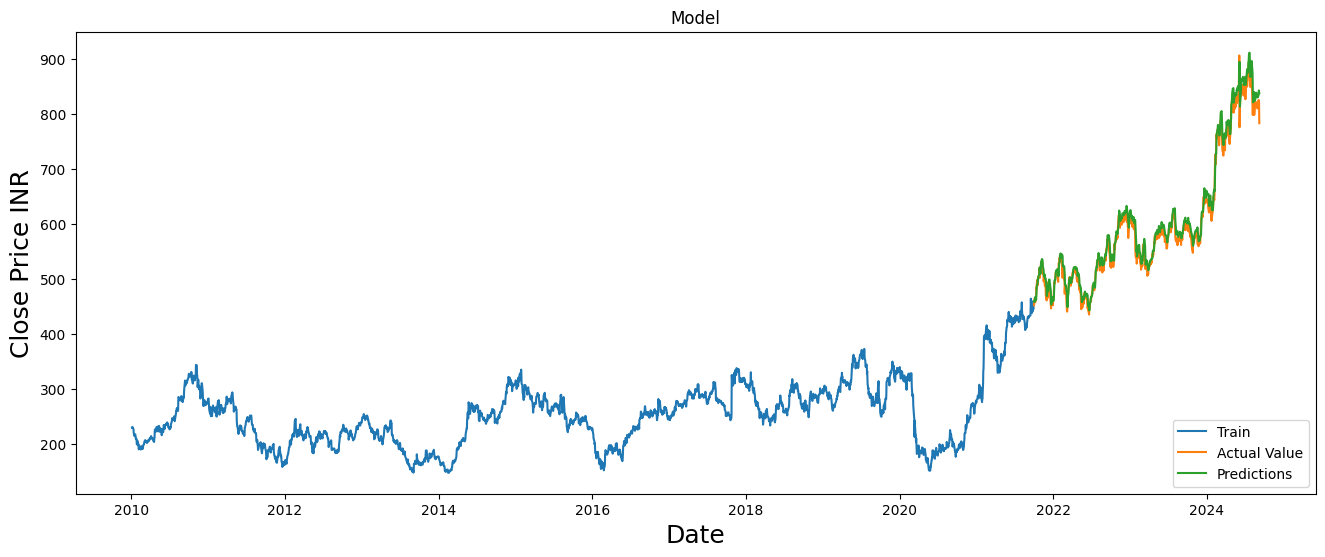

In [83]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [84]:
valid.head()

,Close,Predictions
Date,,
2021-10-01,451.649994,458.759369
2021-10-04,463.149994,457.399231
2021-10-05,464.700012,462.150543
2021-10-06,457.200012,466.382904
2021-10-07,457.899994,464.215302
